In [316]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import cv2
import os
import numpy as np
import pydicom as dicom
import pydicom.uid
import json
from sklearn.model_selection import train_test_split

In [317]:
#make list for images and labels and add by collecting from each source
images = []
labels = []

def get_images(path,condition):
    img_name = list(os.listdir(path))
    #print(img_name)
    for i in img_name:
        img_path = os.path.join(path,i)
        image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        #print(img_path)
        image=cv2.resize(image,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)
        labels.append(condition)

In [318]:
#importing images from source 1,2,7
# it is given that images from all these sources are positive cases
# so we are using 1 for positive condition and - for negative
path = "C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/Covid19action-radiology-CXR_v1.1/images"
path_1 = path+"/Source1"
path_2 = path+"/Source2"
path_7 = path+"/Source7"

get_images(path_1,1)
get_images(path_2,1)
get_images(path_7,1)

In [319]:
print(images[0].shape)
print(len(labels))

(1, 28, 28)
199


In [320]:
def img_from_json(path,name):
    img_name = list(os.listdir(path))
    #print(name)
    #print(img_name)
    for i in img_name:
        img_path = os.path.join(path,i)
        image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(28,28))
        image = image.reshape(1,28,28)
        #print(img_path)
        if i in name:
            images.append(image)
            labels.append(name[i])

In [321]:
# importing images from source 5
# it has its labels in json file

annotation_path="C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder (2)/covid-chestxray-dataset-master/annotations/annotation_file.json"
f = open(annotation_path,) 
data = json.load(f) 
# it contain info  about each patient in object "images" and it is list ,insise that list  "filename" contain file name and 'metadata'
#inside metadata it contain object finding which is string either covid-19 or oher deasese.
filename=dict()
x=data['images']
for i in x:
    file=i['file_name']
    type_covid=i['metadata']
    if type_covid['finding']=='COVID_19':
        filename[file]=1
    else:
        filename[file]=0
        
path_5="C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder (2)/covid-chestxray-dataset-master/images"
img_from_json(path = path_5,name = filename)

In [322]:
# in the same source 5 we have metadata.csv file for remaining images
csv_path = "C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder (2)/covid-chestxray-dataset-master/metadata.csv"
names_file = pd.read_csv(csv_path,usecols=['filename','finding'])
filename2 = dict()
for i,row in names_file.iterrows():
    if row['finding'] == 'COVID-19':
        filename2[row["filename"]] = 1
    else:
        filename2[row["filename"]] = 0

img_from_json(path = path_5,name = filename2)

In [323]:
#importing from
len(images)

1013

In [324]:
filename3 = dict()
path_6 = "C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder/Figure1-COVID-chestxray-dataset-master"
names_file_2 = pd.read_csv(path_6+'/metadata.csv',usecols=['patientid','finding'])
for i,row in names_file_2.iterrows():
    if row['finding'] == 'COVID-19':
        filename3[row['patientid']+'.jpg'] = 1
    else:
        filename3[row['patientid']+'.jpg'] = 0

img_from_json(path = path_6+'/images',name = filename3)

In [325]:
path_4 = 'C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder (3)/images'
#get_images_dcm(path_4,0)

#make list for images and labels and add by collecting from each source
img_name = list(os.listdir(path_4))
l=0
#print(img_name)
for i in img_name:
    img_path = os.path.join(path_4,i)
    image = dicom.read_file(img_path )
    if image is not None:
        image=cv2.resize(image.pixel_array,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)
        labels.append(0)
# img_name = list(os.listdir(path_4))
# x = dicom.dcmread(path_4+'/'+img_name[0])

In [327]:
len(labels)

4063

In [328]:
path_6 = "C:/Users/Lenovo/OneDrive/Documents/civil 6th sem/Deep Learning/assignment on covid/New folder (4)"
img_name = list(os.listdir(path_6))
l=0
#print(img_name)
for i in img_name:
    img_path = os.path.join(path_6,i)
    image = dicom.read_file(img_path)
#     image.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian  # or whatever is the correct transfer syntax for the file
    if image is not None:
        image=cv2.resize(image.pixel_array,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)
        labels.append(0)

In [329]:
len(labels)

30747

In [330]:
images_copy = images
labels_copy = labels

In [331]:


from sklearn.model_selection import train_test_split

print(len(labels))
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.20, random_state=42)
#as the images size is large their is no need to give more size to train
#we split data into 80:20 percent as train:test set

30747


In [332]:
# class Data(Dataset):
#     def __len__(self):
#         return (len(labels))
#     def __getitem__(self,index):
#         image = images[index]
#         label = labels[index]
#         sample = {'images':image,'labels':label}
#         return sample
        
# train_data = Data()

In [333]:
# from torch.utils.data import DataLoader,Dataset
# # # train_data = {'images':images,'labels':labels}
# # # images = pd.DataFrame(images)
# # # labels = pd.DataFrame(labels)
# # # img=[]
# # # lab =[]
# # t=[]
# # for i in range(len(labels)):
# #     if type(labels[i]) == list:
# #         labels.pop(i)
# #         images.pop(i)

In [334]:
# trainloader = DataLoader(train_data,batch_size=64,shuffle=True)
# # type(t[1]['labels'])
# # trainloader = DataLoader(t,batch_size=64,shuffle=True)
# (type(train_data[1]['labels']))==int

In [335]:
test_l= int (len(y_test)/64)
train_l= int (len(X_train)/64)
print(test_l)
train_x=[]
train_y=[]
test_x=[]
test_y=[]
for i in range(test_l):
    s=[]
    z=[]
    for e in range(64):
        s.append(X_test[((64*i)+e)])
        z.append(y_test[((64*i)+e)] )         
    test_x.append(s)
    test_y.append(z)
    
test_x=np.array(test_x)
test_y=np.array(test_y)

for i in range(train_l):
    s=[]
    z=[]
    for e in range(64):
        s.append(X_train[((64*i)+e)])
        z.append(y_train[((64*i)+e)])         
    train_x.append(s)
    train_y.append(z)
train_x=np.array(train_x)
train_y=np.array(train_y)

print(test_x.shape)
print(train_x.shape)
#here we convert test and train set of images and we used batch size of 32
#we have tottal 1024 test images and 4288 train images,we also randomly suffle the data



96
(96, 64, 1, 28, 28)
(384, 64, 1, 28, 28)


In [336]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

# class net(nn.Module):
#   def __init__(self):
#     super(net,self).__init__()
#     self.convo1=nn.Conv2d(1,20,kernel_size=8,stride=1,padding=0)
#     self.max1=nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
#     self.convo2=nn.Conv2d(20,40,kernel_size=4,stride=2,padding=0)
#     self.max2=nn.MaxPool2d(kernel_size=3,stride=2,padding=0)
#     self.fc1=nn.Linear(16*40,100)
#     self.fc1_dropout=nn.Dropout(0.2)
#     self.fc2=nn.Linear(100,64)
#     self.fc3=nn.Linear(64,10)
#   def forward(self,x):
#     x=F.relu(self.convo1(x))
#     x=self.max1(x)
#     x=F.relu(self.convo2(x))
#     x=self.max2(x)
#     x=x.view(-1,16*40)
#     x=F.relu(self.fc1(x))
#     x=F.relu(self.fc2(x))
#     x=F.log_softmax(self.fc3(x),dim=1)
#     return x



In [337]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.conv1=nn.Conv2d(1,20,kernel_size=8,stride=2,padding=0)
    self.mpool1=nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
    self.conv2=nn.Conv2d(20,40,kernel_size=4,stride=1,padding=0)
    self.mpool2=nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
    self.fc1=nn.Linear(36*40,100)
    self.fc1_drop=nn.Dropout(0.2)
    self.fc2=nn.Linear(100,20)
    self.fc3=nn.Linear(20,2)
  def forward(self,x):
    x = x.view(-1, 1, 28, 28) 
    x=self.conv1(x)
    x=F.relu(x)
    x=self.mpool1(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=self.mpool2(x)
    x=x.view(-1,40*36)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc1_drop(x)
    x=self.fc2(x)
    x=F.relu(x)
    x=self.fc3(x)
    x=F.log_softmax(x,dim=1)
    return x


In [340]:
Net = net()
learning_rate=0.001
momentum=0.5
num_epochs=10
optimizer = optim.SGD(Net.parameters(), lr=learning_rate,
                      momentum=momentum)

In [341]:
criterion = nn.CrossEntropyLoss()
train_loss = []
train_acc = []


for epoch in range(num_epochs):
#     epochStartTime = time.time()
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(train_x):
        inputs1 = data
        labels1=train_y[i]
        inputs=torch.from_numpy(inputs1)
        label=torch.from_numpy(labels1)
       
         
        
        # Initializing model gradients to zero
        optimizer.zero_grad()
        # Data feed-forward through the network
        outputs = Net(inputs.float())
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = F.nll_loss(outputs, label.long())
        # Calculating gradients
        loss.backward()
        optimizer.step()

        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==label.long())    
        
   
    # Calculating gradients
    
    # Updating the model parameters
   
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/30000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph

    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
       

Epoch 1/10 : Training loss: 0.1303 | Training Accuracy: 79.7133
Epoch 2/10 : Training loss: 0.1061 | Training Accuracy: 79.9267
Epoch 3/10 : Training loss: 0.1011 | Training Accuracy: 79.9500
Epoch 4/10 : Training loss: 0.0975 | Training Accuracy: 79.9800
Epoch 5/10 : Training loss: 0.0946 | Training Accuracy: 80.0133
Epoch 6/10 : Training loss: 0.0929 | Training Accuracy: 80.0300
Epoch 7/10 : Training loss: 0.0914 | Training Accuracy: 80.0133
Epoch 8/10 : Training loss: 0.0894 | Training Accuracy: 80.0533
Epoch 9/10 : Training loss: 0.0885 | Training Accuracy: 80.0667
Epoch 10/10 : Training loss: 0.0864 | Training Accuracy: 80.0433


In [342]:
len(X_test)

6150

In [343]:
correct_pred = 0
for i in range(len(test_x)):
    input1=test_x[i]
    label1=test_y[i]
    inputs=torch.from_numpy(input1)
    labels=torch.from_numpy(label1)
       
    
    # Feedforward train data batch through model
    output = Net(inputs.float()) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels.long())

test_accuracy = correct_pred.item()/6150
print('Testing accuracy = ',test_accuracy*100)



Testing accuracy =  97.90243902439025


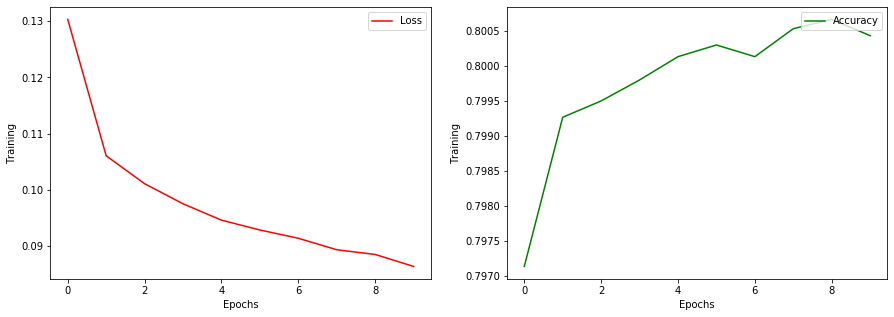

In [344]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.show()

In [311]:
# # print(type(torch.from_numpy(train_y[0])))
# # torch.from_numpy(train_y[0])
# # train_y
# k=0
# for data in enumerate(trainloader):
#     if k==3:
#         break
#     print(data['images'])
#     k = k+1

In [312]:
# criterion = nn.CrossEntropyLoss()
# train_loss = []
# train_acc = []



# for epoch in range(num_epochs):
# #     epochStartTime = time.time()
    
#     running_loss = 0.0 
#     running_corr = 0
#     count=0
#     for i,data in enumerate(trainloader):
#         inputs=data['images']
#         labels=data['labels']
#         inputs=inputs.float()
#         labels=np.asarray(labels)
#         #labels=labels.squeeze(axis=1)
#         labels=torch.tensor(labels)
        

#         # Initializing model gradients to zero
#         optimizer.zero_grad()
#         # Data feed-forward through the network
#         outputs = Net(inputs)
#         # Predicted class is the one with maximum probability
#         preds = torch.argmax(outputs,dim=1)
#         # Finding the loss
#         loss = F.nll_loss(outputs, labels.long())
#         # Calculating gradients
#         loss.backward()
#         optimizer.step()

#         # Accumulating the loss for each batch
#         running_loss += loss 
#         # Accumulate number of correct predictions
#         running_corr += torch.sum(preds==labels.long())    
        
   
#     # Calculating gradients
    
#     # Updating the model parameters
   
        
#     epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
#     epoch_acc = running_corr.item()/986
    
    
         
#     train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
#     train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph

#     print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
       

Epoch 1/20 : Training loss: 0.2347 | Training Accuracy: 5.9838
Epoch 2/20 : Training loss: 0.1633 | Training Accuracy: 6.3895
Epoch 3/20 : Training loss: 0.1102 | Training Accuracy: 6.3895
Epoch 4/20 : Training loss: 0.1111 | Training Accuracy: 6.3895
Epoch 5/20 : Training loss: 0.2016 | Training Accuracy: 6.3895
Epoch 6/20 : Training loss: 0.1072 | Training Accuracy: 6.3895
Epoch 7/20 : Training loss: 0.1040 | Training Accuracy: 6.3895
Epoch 8/20 : Training loss: 0.0960 | Training Accuracy: 6.3895
Epoch 9/20 : Training loss: 0.0709 | Training Accuracy: 6.3895
Epoch 10/20 : Training loss: 0.1533 | Training Accuracy: 6.3895
Epoch 11/20 : Training loss: 0.0765 | Training Accuracy: 6.3895
Epoch 12/20 : Training loss: 0.0890 | Training Accuracy: 6.3895
Epoch 13/20 : Training loss: 0.0937 | Training Accuracy: 6.3895
Epoch 14/20 : Training loss: 0.0498 | Training Accuracy: 6.3895
Epoch 15/20 : Training loss: 0.0937 | Training Accuracy: 6.3895
Epoch 16/20 : Training loss: 0.1007 | Training Ac